In [10]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels import robust
import scipy.stats as stats

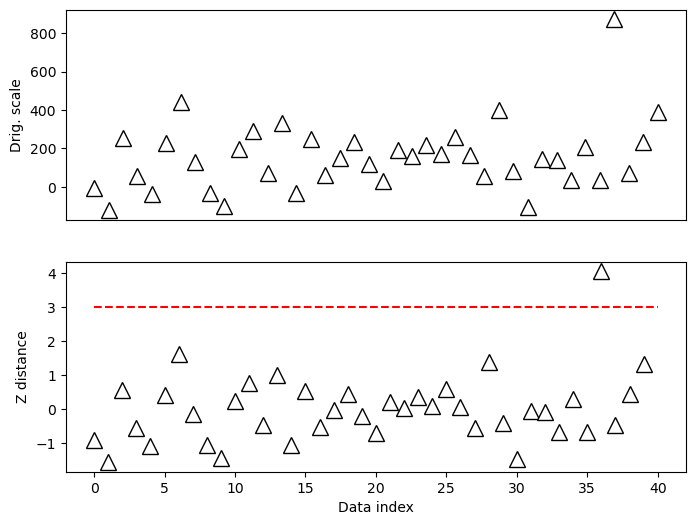

In [11]:
N = 40 
data = np.random.randn(N)
data[data<-1] = data[data<-1]+2
data[data>2] = data[data>2]**2 # try to force outliers
data = data*200 + 50

# convert to z
dataZ = (data-np.mean(data)) / np.std(data)

#### specify threshold
zscorethresh = 3

fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data,'k^', markerfacecolor='w',markersize=12)
ax[0].set_xticks([])
ax[0].set_ylabel('Drig. scale')

# plot scores
ax[1].plot(dataZ,'k^', markerfacecolor='w',markersize=12)
ax[1].plot([0,N],[zscorethresh,zscorethresh],'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Z distance')
plt.show()

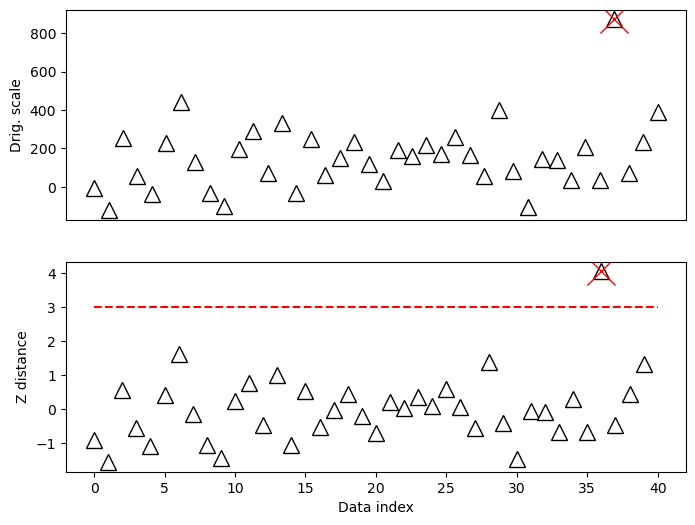

In [12]:
## identify outliers

outliers = np.where(abs(dataZ)>zscorethresh)[0]

# cross them out
ax[0].plot(outliers,data[outliers],'x',color='r',markersize=20)
ax[1].plot(outliers,dataZ[outliers],'x',color='r',markersize=20)

fig


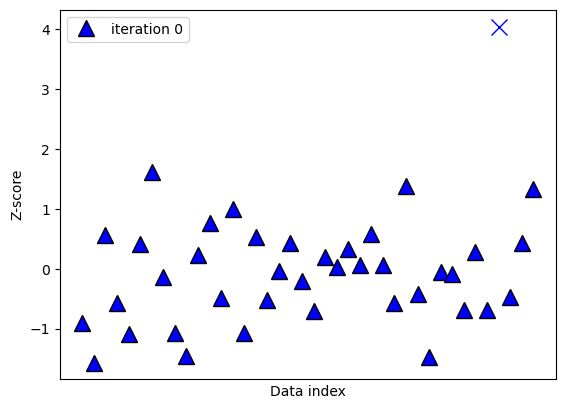

[36]


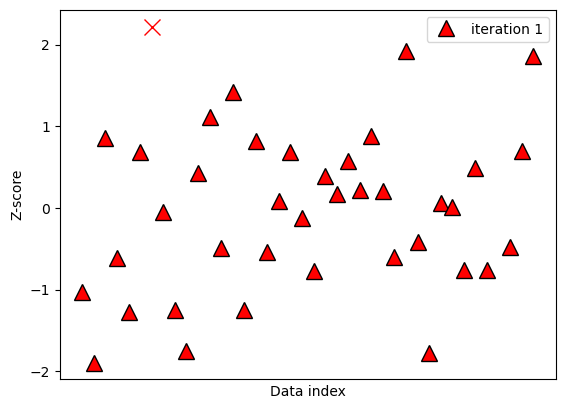

[ 6 36]


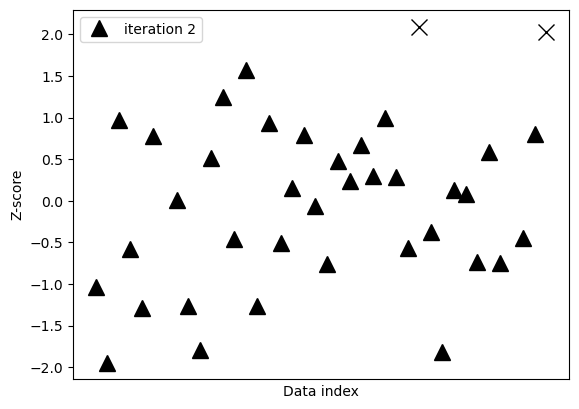

[ 6 28 36 39]


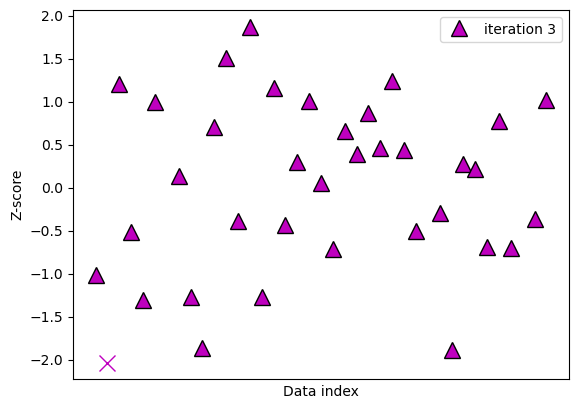

[ 1  6 28 36 39]


IndexError: string index out of range

In [16]:
## iterative method 

zscorethresh = 2

dataZ = (data-np.mean(data)) / np.std(data)


colorz = 'brkm'
numiters = 0
while True:
    
    # convert to z
    datamean = np.nanmean(dataZ)
    datastd = np.nanstd(dataZ)
    dataZ = (dataZ-datamean) / datastd
    
    # find and remove
    toremove = np.abs(dataZ)>zscorethresh
    
    # break out of loop if no points to remove
    if sum(toremove)==0:
        break
    else:
        # mark outliers in plot
        plt.plot(np.where(toremove)[0],dataZ[toremove], '%sx'%colorz[numiters],markersize=12)
        dataZ[toremove] = np.nan
        
    # replot
    plt.plot(dataZ,'k^', markersize='12', markerfacecolor=colorz[numiters],label='iteration %g'%numiters)
    numiters = numiters + 1
    
    plt.xticks([])
    plt.ylabel('Z-score')
    plt.xlabel('Data index')
    plt.legend()
    plt.show()
    
    #### the data points to be removed
    removeFromOriginal = np.where(np.isnan(dataZ))[0]
    print(removeFromOriginal)


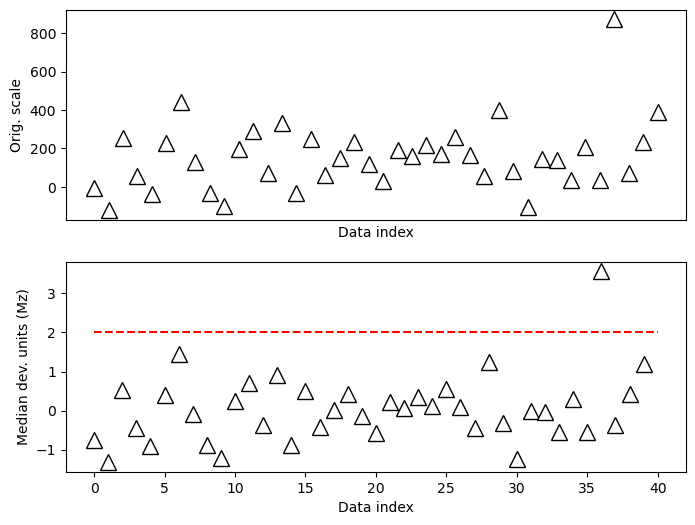

In [18]:
## modified Z for non-normal distributions

# compute modified z

dataMed = np.median(data)
dataMAD = robust.mad(data)

dataMz = stats.norm.ppf(.75)*(data-dataMed) / dataMAD

# plot data
fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data,'k^',markerfacecolor='w',markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Orig. scale')

# plot the zscores

ax[1].plot(dataMz,'k^', markerfacecolor='w', markersize=12)
ax[1].plot([0,N], [zscorethresh,zscorethresh], 'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Median dev. units (Mz)')
plt.show()